In [1]:
import pandas as pd
train_df = pd.read_csv("train.csv", encoding="utf-8")
test_df = pd.read_csv("test.csv", encoding="utf-8")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
med = train_df.median()
train_df = train_df.fillna(med)
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# !!!!! 千萬不要再重算一次, 用訓練資料算出趨勢為主
test_df = test_df.fillna(med)
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [6]:
most = train_df["Embarked"].value_counts().idxmax()
train_df["Embarked"] = train_df["Embarked"].fillna(most)
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
dummy = pd.get_dummies(train_df["Embarked"])
train_df = pd.concat([train_df, dummy], axis=1)

In [8]:
dummy = pd.get_dummies(test_df["Embarked"])
test_df = pd.concat([test_df, dummy], axis=1)

In [9]:
dummy = pd.get_dummies(train_df["Sex"])
train_df = pd.concat([train_df, dummy], axis=1)

In [10]:
dummy = pd.get_dummies(test_df["Sex"])
test_df = pd.concat([test_df, dummy], axis=1)

In [11]:
s = "Braund, Mr. Owen Harris"
s.split(",")[-1].split(".")[0].replace(" ", "")

'Mr'

In [12]:
def midget(s):
    return s.split(",")[-1].split(".")[0].replace(" ", "")
train_df["Name"].apply(midget).value_counts()

Mr             517
Miss           182
Mrs            125
Master          40
Dr               7
Rev              6
Mlle             2
Major            2
Col              2
Don              1
Ms               1
Sir              1
theCountess      1
Jonkheer         1
Lady             1
Mme              1
Capt             1
Name: Name, dtype: int64

In [13]:
def midget2(s):
    mid = s.split(",")[-1].split(".")[0].replace(" ", "")
    reserved = ["Mr", "Miss", "Mrs", "Master"]
    if mid in reserved:
        return mid
    else:
        return "X"
n = train_df["Name"].apply(midget2)
dummy = pd.get_dummies(n)
train_df = pd.concat([train_df, dummy], axis=1)

In [14]:
n = test_df["Name"].apply(midget2)
dummy = pd.get_dummies(n)
test_df = pd.concat([test_df, dummy], axis=1)

In [15]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'C', 'Q', 'S', 'female',
       'male', 'Master', 'Miss', 'Mr', 'Mrs', 'X'],
      dtype='object')

In [16]:
train = train_df.drop(["PassengerId", "Sex", "Name", "Ticket", "Cabin", "Embarked", "X"], axis=1)
train

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Master,Miss,Mr,Mrs
0,0,3,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,0,1
2,1,3,26.0,0,0,7.9250,0,0,1,1,0,0,1,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0
5,0,3,28.0,0,0,8.4583,0,1,0,0,1,0,0,1,0
6,0,1,54.0,0,0,51.8625,0,0,1,0,1,0,0,1,0
7,0,3,2.0,3,1,21.0750,0,0,1,0,1,1,0,0,0
8,1,3,27.0,0,2,11.1333,0,0,1,1,0,0,0,0,1
9,1,2,14.0,1,0,30.0708,1,0,0,1,0,0,0,0,1


In [17]:
test = test_df.drop(["PassengerId", "Sex", "Name", "Ticket", "Cabin", "Embarked", "X"], axis=1)
test

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Master,Miss,Mr,Mrs
0,3,34.5,0,0,7.8292,0,1,0,0,1,0,0,1,0
1,3,47.0,1,0,7.0000,0,0,1,1,0,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,0,1,0,0,1,0
3,3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1,0
4,3,22.0,1,1,12.2875,0,0,1,1,0,0,0,0,1
5,3,14.0,0,0,9.2250,0,0,1,0,1,0,0,1,0
6,3,30.0,0,0,7.6292,0,1,0,1,0,0,1,0,0
7,2,26.0,1,1,29.0000,0,0,1,0,1,0,0,1,0
8,3,18.0,0,0,7.2292,1,0,0,1,0,0,0,0,1
9,3,21.0,2,0,24.1500,0,0,1,0,1,0,0,1,0


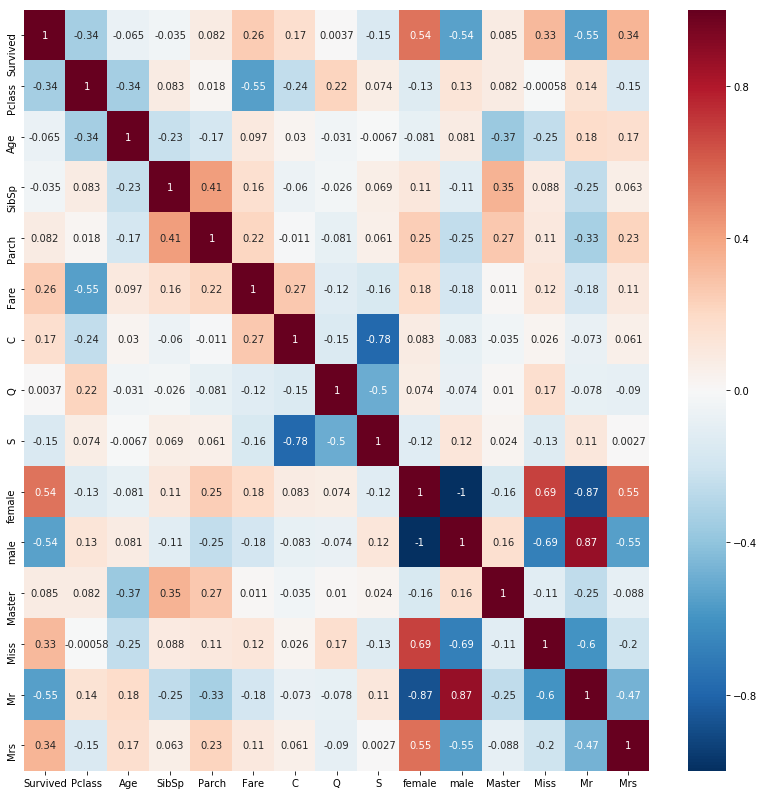

In [25]:
# heatmap API: https://seaborn.pydata.org/generated/seaborn.heatmap.html
# colormap: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(14, 14))
sns.heatmap(train.corr(), annot=True, cmap="RdBu_r")

In [26]:
x_train = train.drop(["Survived"], axis=1)
y_train = train["Survived"]

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()
grid = {
    "n_estimators":range(25, 35, 1),
    "max_depth":range(6, 10)
}
gridsearch = GridSearchCV(clf, param_grid=grid, cv=10, n_jobs=8)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 7, 'n_estimators': 32}

In [152]:
## from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
clf = RandomForestClassifier(n_estimators=27, max_depth=7)
scores = cross_val_score(clf, x_train, y_train, cv=10)
print("十次:", scores)
print("平均:", np.average(scores))

十次: [0.76666667 0.81111111 0.76404494 0.88764045 0.8988764  0.84269663
 0.80898876 0.76404494 0.86516854 0.85227273]
平均: 0.8261511179207808


In [153]:
clf = RandomForestClassifier(n_estimators=27, max_depth=7)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=27, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [156]:
result = pd.DataFrame()
pid = test_df["PassengerId"]
pre = clf.predict(test)
result["PassengerId"] = pid
result["Survived"] = pre
result.to_csv("titanic.csv", index=False)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [158]:
im = pd.DataFrame()
im["name"] = x_train.columns
im["importance"] = clf.feature_importances_
im

,name,importance
0,Pclass,0.116750
1,Age,0.107867
2,SibSp,0.050430
3,Parch,0.029021
4,Fare,0.141193
5,C,0.010560
6,Q,0.010501
7,S,0.012816
8,female,0.191483
9,male,0.064810
